In [2]:
# Import some librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
plt.style.use('seaborn')
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
# Modifies dataframe 
pd.set_option('display.max_rows', None) # allows reviewer to see all rows
pd.set_option('display.max_colwidth', -1) # allows reviewer to see all columns
pd.set_option('display.float_format', '{:20,.2f}'.format) # formats values to #,###.##

In [4]:
vendors = pd.read_excel ('Purchasing.PurchaseOrderHeader.xlsx', 'Vendor', usecols='A:C')
orders = pd.read_excel ('Purchasing.PurchaseOrderHeader.xlsx', 'Orders')

In [5]:
# Quick preview of the dataframe
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
BusinessEntityID    104 non-null int64
AccountNumber       104 non-null object
Name                104 non-null object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
# Quick preview of the dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 13 columns):
PurchaseOrderID    4012 non-null int64
RevisionNumber     4012 non-null int64
Status             4012 non-null int64
EmployeeID         4012 non-null int64
VendorID           4012 non-null int64
ShipMethodID       4012 non-null int64
OrderDate          4012 non-null datetime64[ns]
ShipDate           4012 non-null datetime64[ns]
SubTotal           4012 non-null float64
TaxAmt             4012 non-null float64
Freight            4012 non-null float64
TotalDue           4012 non-null float64
ModifiedDate       4012 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(6)
memory usage: 407.5 KB


In [7]:
# Quick preview of the dataframe
vendors.head()

,BusinessEntityID,AccountNumber,Name
0,1492,AUSTRALI0001,Australia Bike Retailer
1,1494,ALLENSON0001,Allenson Cycles
2,1496,ADVANCED0001,Advanced Bicycles
3,1498,TRIKES0001,"Trikes, Inc."
4,1500,MORGANB0001,Morgan Bike Accessories


In [8]:
# Quick preview of the dataframe
orders.head()

,PurchaseOrderID,RevisionNumber,Status,EmployeeID,VendorID,ShipMethodID,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,ModifiedDate
0,1,4,4,258,1580,3,2011-04-16,2011-04-25,201.04,16.08,5.03,222.15,2011-04-25
1,2,4,1,254,1496,5,2011-04-16,2011-04-25,272.10,21.77,6.80,300.67,2011-04-25
2,3,4,4,257,1494,2,2011-04-16,2011-04-25,"8,847.30",707.78,221.18,"9,776.27",2011-04-25
3,4,4,3,261,1650,5,2011-04-16,2011-04-25,171.08,13.69,4.28,189.04,2011-04-25
4,5,4,4,251,1654,4,2011-04-30,2011-05-09,"20,397.30","1,631.78",509.93,"22,539.02",2011-05-09


In [9]:
# Combine the two dataframes so that the Vendor Name will be included with the Vendor ID
orders_v2 = pd.merge(orders, vendors, how='left', left_on='VendorID', right_on='BusinessEntityID')

In [10]:
# Quick preview of the dataframe
orders_v2.head()

,PurchaseOrderID,RevisionNumber,Status,EmployeeID,VendorID,ShipMethodID,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,ModifiedDate,BusinessEntityID,AccountNumber,Name
0,1,4,4,258,1580,3,2011-04-16,2011-04-25,201.04,16.08,5.03,222.15,2011-04-25,1580,LITWARE0001,"Litware, Inc."
1,2,4,1,254,1496,5,2011-04-16,2011-04-25,272.10,21.77,6.80,300.67,2011-04-25,1496,ADVANCED0001,Advanced Bicycles
2,3,4,4,257,1494,2,2011-04-16,2011-04-25,"8,847.30",707.78,221.18,"9,776.27",2011-04-25,1494,ALLENSON0001,Allenson Cycles
3,4,4,3,261,1650,5,2011-04-16,2011-04-25,171.08,13.69,4.28,189.04,2011-04-25,1650,AMERICAN0001,American Bicycles and Wheels
4,5,4,4,251,1654,4,2011-04-30,2011-05-09,"20,397.30","1,631.78",509.93,"22,539.02",2011-05-09,1654,AMERICAN0002,American Bikes


In [11]:
# Quick preview of the data frame and review of the row count for any possible issues
orders_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4012 entries, 0 to 4011
Data columns (total 16 columns):
PurchaseOrderID     4012 non-null int64
RevisionNumber      4012 non-null int64
Status              4012 non-null int64
EmployeeID          4012 non-null int64
VendorID            4012 non-null int64
ShipMethodID        4012 non-null int64
OrderDate           4012 non-null datetime64[ns]
ShipDate            4012 non-null datetime64[ns]
SubTotal            4012 non-null float64
TaxAmt              4012 non-null float64
Freight             4012 non-null float64
TotalDue            4012 non-null float64
ModifiedDate        4012 non-null datetime64[ns]
BusinessEntityID    4012 non-null int64
AccountNumber       4012 non-null object
Name                4012 non-null object
dtypes: datetime64[ns](3), float64(4), int64(7), object(2)
memory usage: 532.8+ KB


In [12]:
# Adding two columns for further review
orders_v2['OrderPeriod'] = orders_v2['OrderDate'].dt.strftime('%Y-%m')
orders_v2['OrderYear'] = orders_v2['OrderDate'].dt.strftime('%Y')
orders_v2.head()

,PurchaseOrderID,RevisionNumber,Status,EmployeeID,VendorID,ShipMethodID,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,ModifiedDate,BusinessEntityID,AccountNumber,Name,OrderPeriod,OrderYear
0,1,4,4,258,1580,3,2011-04-16,2011-04-25,201.04,16.08,5.03,222.15,2011-04-25,1580,LITWARE0001,"Litware, Inc.",2011-04,2011
1,2,4,1,254,1496,5,2011-04-16,2011-04-25,272.10,21.77,6.80,300.67,2011-04-25,1496,ADVANCED0001,Advanced Bicycles,2011-04,2011
2,3,4,4,257,1494,2,2011-04-16,2011-04-25,"8,847.30",707.78,221.18,"9,776.27",2011-04-25,1494,ALLENSON0001,Allenson Cycles,2011-04,2011
3,4,4,3,261,1650,5,2011-04-16,2011-04-25,171.08,13.69,4.28,189.04,2011-04-25,1650,AMERICAN0001,American Bicycles and Wheels,2011-04,2011
4,5,4,4,251,1654,4,2011-04-30,2011-05-09,"20,397.30","1,631.78",509.93,"22,539.02",2011-05-09,1654,AMERICAN0002,American Bikes,2011-04,2011


In [13]:
# Create a seperate dataframe that sums the 'TotalDue' column by 'OrderPeriod'
ordertrend = orders_v2.groupby('OrderPeriod')[['TotalDue']].sum().sort_values(by='OrderPeriod')

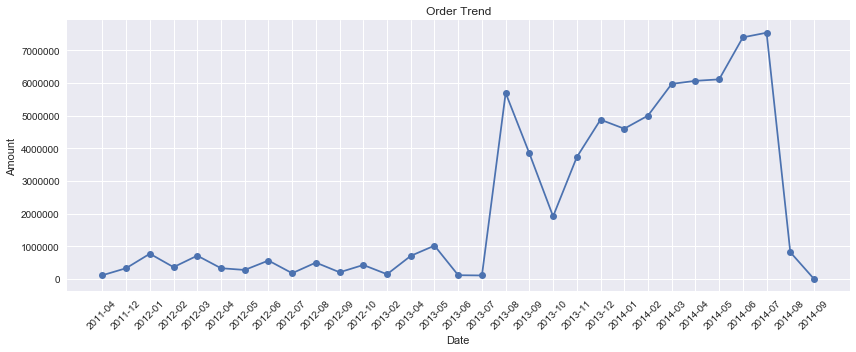

In [14]:
# Modifies the plot view
plt.rcParams['figure.figsize'] = [12,5] #[width, height]
plt.xticks(rotation=45)

# variables for plot
order_date = ordertrend.index
order_amount = ordertrend['TotalDue']

# Plot while using the variables
plt.plot_date(order_date, order_amount, linestyle='solid')

plt.title('Order Trend')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.tight_layout()

In [23]:
# uses the 'orders_v2' dataframe to create a pivot table
pivot = pd.pivot_table(orders_v2, values=['TotalDue'], columns=['OrderYear'], index=['Name'], aggfunc=np.sum, fill_value=0)
pivot.head(10)

TotalDue                       \
OrderYear                                    2011                 2012   
Name                                                                     
Advanced Bicycles                          300.67             1,716.71   
Allenson Cycles                          9,776.27            29,328.80   
American Bicycles and Wheels               189.04               567.12   
American Bikes                          22,539.02            67,617.05   
Anderson's Custom Bikes                 16,164.02            48,492.07   
Aurora Bike Center                         766.18             1,912.29   
Australia Bike Retailer                    767.05             2,134.57   
Beaumont Bikes                           1,984.62             5,953.86   
Bergeron Off-Roads                         553.82             1,865.19   
Bicycle Specialists                     38,281.87           114,845.61   

                                                                        
OrderYear                                    2013                 2014  
Name                                                                    
Advanced Bicycles                       12,765.48            13,719.24  
Allenson Cycles                        166,196.53           293,288.00  
American Bicycles and Wheels             3,213.67             5,671.18  
American Bikes                         383,163.28           676,170.50  
Anderson's Custom Bikes                274,788.39           484,920.69  
Aurora Bike Center                      10,426.41            17,124.49  
Australia Bike Retailer                  8,489.31            13,669.11  
Beaumont Bikes                          23,815.43            47,630.86  
Bergeron Off-Roads                      15,964.98            20,238.12  
Bicycle Specialists                    650,791.77         1,148,456.06

In [20]:
# Shows the top 10 vendors in 2014
pivot.sort_values(by=('TotalDue', '2014'), ascending=False, inplace=True)
pivot.head(10)

TotalDue                       \
OrderYear                                         2011                 2012   
Name                                                                          
Superior Bicycles                                 0.00           302,056.00   
Professional Athletic Consultants                 0.00           167,364.32   
Chicago City Saddles                         87,520.56           249,684.06   
Jackson Authority                                 0.00           211,600.01   
Sport Fan Co.                                     0.00           205,837.63   
Vision Cycles, Inc.                               0.00           138,884.25   
Proseware, Inc.                              64,847.53           166,547.51   
Greenwood Athletic Company                        0.00           193,942.75   
Mitchell Sports                                   0.00           145,457.06   
Crowley Sport                                48,485.69           145,457.06   

                                                                             
OrderYear                                         2013                 2014  
Name                                                                         
Superior Bicycles                         1,610,965.36         3,121,245.38  
Professional Athletic Consultants         1,166,470.68         2,046,111.32  
Chicago City Saddles                        986,732.87         2,023,227.71  
Jackson Authority                           846,400.05         1,763,333.45  
Sport Fan Co.                               754,737.98         1,715,313.60  
Vision Cycles, Inc.                         972,189.72         1,666,610.95  
Proseware, Inc.                             806,165.49         1,556,340.79  
Greenwood Athletic Company                  775,771.00         1,503,056.31  
Mitchell Sports                             775,771.00         1,503,056.31  
Crowley Sport                               775,771.00         1,503,056.31

In [21]:
# Shows the top 10 vendors in 2013
pivot.sort_values(by=('TotalDue', '2013'), ascending=False, inplace=True)
pivot.head(10)

TotalDue                       \
OrderYear                                         2011                 2012   
Name                                                                          
Superior Bicycles                                 0.00           302,056.00   
Professional Athletic Consultants                 0.00           167,364.32   
Chicago City Saddles                         87,520.56           249,684.06   
Vision Cycles, Inc.                               0.00           138,884.25   
Jackson Authority                                 0.00           211,600.01   
Proseware, Inc.                              64,847.53           166,547.51   
Greenwood Athletic Company                        0.00           193,942.75   
Mitchell Sports                                   0.00           145,457.06   
Crowley Sport                                48,485.69           145,457.06   
Sport Fan Co.                                     0.00           205,837.63   

                                                                             
OrderYear                                         2013                 2014  
Name                                                                         
Superior Bicycles                         1,610,965.36         3,121,245.38  
Professional Athletic Consultants         1,166,470.68         2,046,111.32  
Chicago City Saddles                        986,732.87         2,023,227.71  
Vision Cycles, Inc.                         972,189.72         1,666,610.95  
Jackson Authority                           846,400.05         1,763,333.45  
Proseware, Inc.                             806,165.49         1,556,340.79  
Greenwood Athletic Company                  775,771.00         1,503,056.31  
Mitchell Sports                             775,771.00         1,503,056.31  
Crowley Sport                               775,771.00         1,503,056.31  
Sport Fan Co.                               754,737.98         1,715,313.60

In [24]:
# Shows the top 10 vendors in 2012
pivot.sort_values(by=('TotalDue', '2012'), ascending=False, inplace=True)
pivot.head(10)

TotalDue                       \
OrderYear                                         2011                 2012   
Name                                                                          
Superior Bicycles                                 0.00           302,056.00   
Chicago City Saddles                         87,520.56           249,684.06   
Jackson Authority                                 0.00           211,600.01   
Sport Fan Co.                                     0.00           205,837.63   
Greenwood Athletic Company                        0.00           193,942.75   
First Rate Bicycles                               0.00           168,602.31   
Professional Athletic Consultants                 0.00           167,364.32   
Proseware, Inc.                              64,847.53           166,547.51   
Electronic Bike Repair & Supplies                 0.00           159,221.69   
Inline Accessories                                0.00           153,127.47   

                                                                             
OrderYear                                         2013                 2014  
Name                                                                         
Superior Bicycles                         1,610,965.36         3,121,245.38  
Chicago City Saddles                        986,732.87         2,023,227.71  
Jackson Authority                           846,400.05         1,763,333.45  
Sport Fan Co.                               754,737.98         1,715,313.60  
Greenwood Athletic Company                  775,771.00         1,503,056.31  
First Rate Bicycles                         730,610.00         1,405,019.24  
Professional Athletic Consultants         1,166,470.68         2,046,111.32  
Proseware, Inc.                             806,165.49         1,556,340.79  
Electronic Bike Repair & Supplies           689,960.65         1,305,591.04  
Inline Accessories                          612,509.90         1,186,737.93

In [22]:
# Totals 2011 - 2014 by vendor and sorts in descending order
vendorsum = orders_v2.groupby(['Name'])[['TotalDue']].sum().sort_values(by='TotalDue', ascending=False)
vendorsum

,TotalDue
Name,
Superior Bicycles,"5,034,266.74"
Professional Athletic Consultants,"3,379,946.32"
Chicago City Saddles,"3,347,165.20"
Jackson Authority,"2,821,333.52"
"Vision Cycles, Inc.","2,777,684.91"
Sport Fan Co.,"2,675,889.22"
"Proseware, Inc.","2,593,901.31"
Greenwood Athletic Company,"2,472,770.05"
Crowley Sport,"2,472,770.05"
